In [ ]:
# Install necessary libraries
!pip install torch torchvision tqdm scikit-learn matplotlib

import os
import zipfile
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define Google Drive paths for datasets and CSV files
plant_doc_zip_path = '/content/drive/My Drive/datasets/plantdoc.zip'
plant_village_zip_path = '/content/drive/My Drive/datasets/plantvillage.zip'
train_csv_path = '/content/drive/My Drive/datasets/PV train.csv'
test_seen_csv_path = '/content/drive/My Drive/datasets/PV test seen.csv'
test_unseen_csv_path = '/content/drive/My Drive/datasets/PV test unseen.csv'
plantdoc_unseen_csv_path = '/content/drive/My Drive/datasets/PD test unseen.csv'

# Temporary extraction paths
temp_extract_path = '/content'

# Extract datasets
with zipfile.ZipFile(plant_doc_zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_extract_path)
with zipfile.ZipFile(plant_village_zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_extract_path)

# Paths for extracted datasets
plant_doc_extract_path = '/content/plantdoc' if os.path.exists('/content/plantdoc') else '/content'
plant_village_extract_path = '/content/plantvillage/plantvillage' if os.path.exists('/content/plantvillage/plantvillage') else '/content/plantvillage'

# Load CSV files
train_df = pd.read_csv(train_csv_path, header=None, names=['image', 'crop', 'disease'])
test_seen_df = pd.read_csv(test_seen_csv_path, header=None, names=['image', 'crop', 'disease'])
test_unseen_df = pd.read_csv(test_unseen_csv_path, header=None, names=['image', 'crop', 'disease'])
plantdoc_unseen_df = pd.read_csv(plantdoc_unseen_csv_path, header=None, names=['image', 'crop', 'disease'])

print("Training Data Sample:")
print(train_df.head())

# Install necessary libraries
!pip install torch torchvision tqdm matplotlib sentence-transformers
import os
import zipfile
import pandas as pd
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import DataLoader, Dataset
from sentence_transformers import SentenceTransformer
import torch
import torch.nn as nn
from torchvision import models
from torch.nn.functional import normalize
from torch.optim import Adam
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformations
transform = Compose([Resize((224, 224)), ToTensor()])

# Dataset class
class PlantDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = os.path.join(self.root_dir, row['image'])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        crop_label = int(row['crop'])
        disease_label = int(row['disease'])
        return image, crop_label, disease_label

# Prepare datasets and loaders
train_dataset = PlantDataset(train_df, plant_village_extract_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_seen_dataset = PlantDataset(test_seen_df, plant_village_extract_path, transform=transform)
test_seen_loader = DataLoader(test_seen_dataset, batch_size=32, shuffle=False)

test_unseen_dataset = PlantDataset(test_unseen_df, plant_village_extract_path, transform=transform)
test_unseen_loader = DataLoader(test_unseen_dataset, batch_size=32, shuffle=False)

# Prepare PlantDoc dataset
plantdoc_extract_path = '/content/plantdoc'  # Define the correct PlantDoc extraction path
plantdoc_unseen_dataset = PlantDataset(plantdoc_unseen_df, plantdoc_extract_path, transform=transform)
plantdoc_unseen_loader = DataLoader(plantdoc_unseen_dataset, batch_size=32, shuffle=False)



# Crop and Disease Descriptions
plant_crop_descriptions = {
    0: "Oval shape, serrated edges, dark green",
    1: "Heart-shaped, smooth edges, dark green",
    2: "Oval-shaped, fine serrations, bright green",
    3: "Broad, smooth texture, parallel veins",
    4: "Lobed shape, serrated edges, green surface",
    5: "Round shape, smooth edges, glossy green",
    6: "Yellow leaf, elliptical shape, serrated edges",
    7: "Heart-shaped, smooth edges, deep green",
    8: "Heart-shaped, textured veins, vibrant green",
    9: "Heart-shaped, serrated edges, bright green",
    10: "Smooth texture, heart-shaped, medium green",
    11: "Lobed shape, rough texture, pale green",
    12: "Oval-shaped, serrated edges, multicolored green and red",
    13: "Elongated shape, uneven edges, green tones"
}

plant_disease_descriptions = {
    0: "Healthy leaf, no visible disease signs",
    1: "Spotted leaf, possible fungal infection signs",
    2: "Brown spots, uneven distribution, slight discoloration",
    3: "Brown spots, uneven patterns, surrounding discoloration",
    4: "White patches, powdery texture, fungal signs visible",
    5: "Brown streaks, specks, possible rust disease",
    6: "Dense brown specks, likely rust infection",
    7: "Large brown patches, necrosis, fungal infection",
    8: "Brown specks, white lesion, disease evident",
    9: "Dark spots, edge browning, severe infection",
    10: "Yellowing patches, possible nutrient deficiency signs",
    11: "Yellowing leaf, black spots, fungal infection",
    12: "Dark lesions, irregular patches, advanced infection",
    13: "Brown patches, curling edges, disease evident",
    14: "Red-brown spots, perforations, severe infection",
    15: "Yellowing, uneven chlorosis, potential nutrient deficiency",
    16: "Yellowing with black spots, early infection",
    17: "Dark spots, curling edges, potential infection",
    18: "Dry patches, discoloration, signs of stress",
    19: "Yellowing leaf, vein chlorosis, nutrient deficiency",
    20: "Green leaf, mild curling, potential stress signs"
}



Mounted at /content/drive
Training Data Sample:
                                               image  crop  disease
0  4b22a1e7-745b-4c78-a49e-14ca8cfba26a___RS_HL-8...     0        0
1  9ee2b5e6-46cf-400f-a82f-660a2ac05157___RS_HL-5...     0        0
2  181ce194-fdc9-4f0b-ae8d-0c621f723279___RS_HL-7...     0        0
3  3e8eb97c-b2ad-4aeb-82ff-2f1334801c9b___RS_HL-6...     0        0
4  4e817ac6-818a-431f-af6d-e44477f9b649___RS_HL-7...     0        0


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


**Use gpu**

In [ ]:
# Generate embeddings on CPU
embedding_model = SentenceTransformer('all-MiniLM-L6-v2', device='cpu')
crop_embeddings = torch.tensor(embedding_model.encode(list(plant_crop_descriptions.values())), dtype=torch.float32)
disease_embeddings = torch.tensor(embedding_model.encode(list(plant_disease_descriptions.values())), dtype=torch.float32)

# Transfer embeddings to GPU
crop_embeddings = crop_embeddings.to('cuda')
disease_embeddings = disease_embeddings.to('cuda')

print("Crop Embeddings Shape (on GPU):", crop_embeddings.shape)
print("Disease Embeddings Shape (on GPU):", disease_embeddings.shape)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Crop Embeddings Shape (on GPU): torch.Size([14, 384])
Disease Embeddings Shape (on GPU): torch.Size([21, 384])


In [ ]:

# Improved model
class ImprovedDualBranchModel(nn.Module):
    def __init__(self, num_crops, num_diseases, embedding_dim=300, pretrained_embeddings=None):
        super(ImprovedDualBranchModel, self).__init__()
        self.backbone = models.resnet18(weights='IMAGENET1K_V1')
        self.backbone.fc = nn.Identity()

        # Use provided embeddings
        self.crop_embeddings = nn.Embedding.from_pretrained(pretrained_embeddings["crop"], freeze=True)
        self.disease_embeddings = nn.Embedding.from_pretrained(pretrained_embeddings["disease"], freeze=True)

        # Feature projection
        self.feature_projector = nn.Linear(512, embedding_dim)
        self.crop_classifier = nn.Linear(embedding_dim, num_crops)
        self.disease_classifier = nn.Linear(embedding_dim, num_diseases)

    def forward(self, x):
        features = self.backbone(x)
        projected_features = self.feature_projector(features)
        normalized_features = normalize(projected_features, p=2, dim=1)
        crop_logits = self.crop_classifier(normalized_features)
        disease_logits = self.disease_classifier(normalized_features)
        return crop_logits, disease_logits, normalized_features

# Prepare pretrained embeddings
pretrained_embeddings = {
    "crop": crop_embeddings,
    "disease": disease_embeddings
}

# Initialize model
num_crops = len(plant_crop_descriptions)
num_diseases = len(plant_disease_descriptions)
embedding_dim = crop_embeddings.shape[1]
model = ImprovedDualBranchModel(num_crops, num_diseases, embedding_dim, pretrained_embeddings).to(device)

# Loss functions
classification_criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = Adam(model.parameters(), lr=0.001)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 210MB/s]


In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Training and validation configuration
num_epochs = 30
patience = 5
best_val_loss = float('inf')
patience_counter = 0

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct_crop, correct_disease = 0, 0
    total = 0

    for images, crop_labels, disease_labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        images, crop_labels, disease_labels = images.to(device), crop_labels.to(device), disease_labels.to(device)

        optimizer.zero_grad()
        crop_logits, disease_logits, _ = model(images)

        crop_loss = classification_criterion(crop_logits, crop_labels)
        disease_loss = classification_criterion(disease_logits, disease_labels)
        loss = crop_loss + disease_loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct_crop += (torch.max(crop_logits, 1)[1] == crop_labels).sum().item()
        correct_disease += (torch.max(disease_logits, 1)[1] == disease_labels).sum().item()
        total += crop_labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_crop_acc = correct_crop / total
    train_disease_acc = correct_disease / total
    train_losses.append(train_loss)
    train_accuracies.append((train_crop_acc + train_disease_acc) / 2)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_crop, correct_disease = 0, 0
    total = 0

    with torch.no_grad():
        for images, crop_labels, disease_labels in tqdm(test_seen_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
            images, crop_labels, disease_labels = images.to(device), crop_labels.to(device), disease_labels.to(device)

            crop_logits, disease_logits, _ = model(images)

            crop_loss = classification_criterion(crop_logits, crop_labels)
            disease_loss = classification_criterion(disease_logits, disease_labels)
            loss = crop_loss + disease_loss

            val_loss += loss.item()
            correct_crop += (torch.max(crop_logits, 1)[1] == crop_labels).sum().item()
            correct_disease += (torch.max(disease_logits, 1)[1] == disease_labels).sum().item()
            total += crop_labels.size(0)

    val_loss /= len(test_seen_loader)
    val_crop_acc = correct_crop / total
    val_disease_acc = correct_disease / total
    val_losses.append(val_loss)
    val_accuracies.append((val_crop_acc + val_disease_acc) / 2)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {(train_crop_acc + train_disease_acc) / 2:.4f}")
    print(f"  Val Loss: {val_loss:.4f}, Val Acc: {(val_crop_acc + val_disease_acc) / 2:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break



Epoch 1/30 - Validation: 100%|██████████| 322/322 [00:24<00:00, 13.03it/s]


Epoch 1/30
  Train Loss: 0.1291, Train Acc: 0.9818
  Val Loss: 0.1447, Val Acc: 0.9780


Epoch 2/30 - Validation: 100%|██████████| 322/322 [00:24<00:00, 13.15it/s]


Epoch 2/30
  Train Loss: 0.1063, Train Acc: 0.9846
  Val Loss: 0.2102, Val Acc: 0.9678


Epoch 3/30 - Validation: 100%|██████████| 322/322 [00:25<00:00, 12.87it/s]


Epoch 3/30
  Train Loss: 0.0772, Train Acc: 0.9887
  Val Loss: 0.2303, Val Acc: 0.9710


Epoch 4/30 - Validation: 100%|██████████| 322/322 [00:24<00:00, 12.88it/s]


Epoch 4/30
  Train Loss: 0.0624, Train Acc: 0.9904
  Val Loss: 0.1496, Val Acc: 0.9802


Epoch 5/30 - Validation: 100%|██████████| 322/322 [00:24<00:00, 12.90it/s]


Epoch 5/30
  Train Loss: 0.0622, Train Acc: 0.9903
  Val Loss: 0.1372, Val Acc: 0.9801


Epoch 6/30 - Validation: 100%|██████████| 322/322 [00:24<00:00, 13.14it/s]


Epoch 6/30
  Train Loss: 0.0500, Train Acc: 0.9926
  Val Loss: 0.1145, Val Acc: 0.9833


Epoch 7/30 - Validation: 100%|██████████| 322/322 [00:25<00:00, 12.79it/s]


Epoch 7/30
  Train Loss: 0.0459, Train Acc: 0.9927
  Val Loss: 0.1675, Val Acc: 0.9775


Epoch 8/30 - Validation: 100%|██████████| 322/322 [00:24<00:00, 12.90it/s]


Epoch 8/30
  Train Loss: 0.0383, Train Acc: 0.9942
  Val Loss: 0.0714, Val Acc: 0.9905


Epoch 9/30 - Validation: 100%|██████████| 322/322 [00:25<00:00, 12.51it/s]


Epoch 9/30
  Train Loss: 0.0372, Train Acc: 0.9942
  Val Loss: 0.0580, Val Acc: 0.9919


Epoch 10/30 - Validation: 100%|██████████| 322/322 [00:25<00:00, 12.73it/s]


Epoch 10/30
  Train Loss: 0.0328, Train Acc: 0.9952
  Val Loss: 0.0699, Val Acc: 0.9898


Epoch 11/30 - Validation: 100%|██████████| 322/322 [00:25<00:00, 12.75it/s]


Epoch 11/30
  Train Loss: 0.0320, Train Acc: 0.9951
  Val Loss: 0.0614, Val Acc: 0.9910


Epoch 12/30 - Validation: 100%|██████████| 322/322 [00:25<00:00, 12.84it/s]


Epoch 12/30
  Train Loss: 0.0283, Train Acc: 0.9957
  Val Loss: 0.0837, Val Acc: 0.9894


Epoch 13/30 - Validation: 100%|██████████| 322/322 [00:25<00:00, 12.80it/s]


Epoch 13/30
  Train Loss: 0.0202, Train Acc: 0.9970
  Val Loss: 0.1054, Val Acc: 0.9861


Epoch 14/30 - Validation: 100%|██████████| 322/322 [00:25<00:00, 12.73it/s]

Epoch 14/30
  Train Loss: 0.0289, Train Acc: 0.9956
  Val Loss: 0.1052, Val Acc: 0.9871
Early stopping triggered!


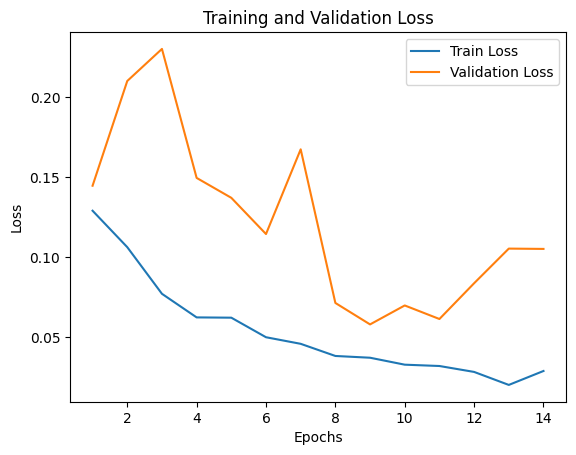

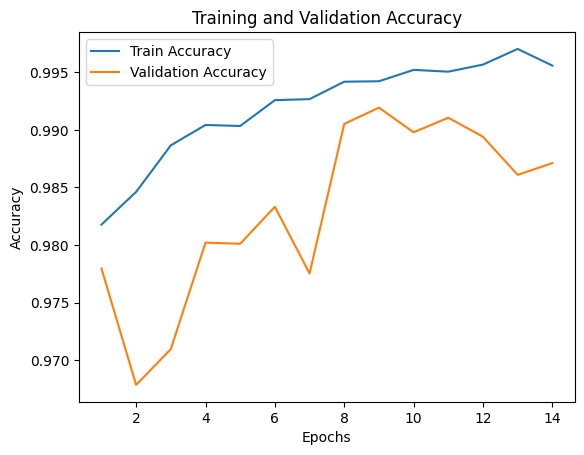

In [ ]:
# Plot training and validation loss
plt.figure()
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure()
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluation function for any dataset
def evaluate_model(model, dataloader, dataset_name):
    model.eval()
    correct_crop, correct_disease = 0, 0
    total = 0
    crop_predictions, disease_predictions = [], []
    crop_labels_list, disease_labels_list = [], []

    with torch.no_grad():
        for images, crop_labels, disease_labels in tqdm(dataloader, desc=f"Evaluating on {dataset_name}"):
            images, crop_labels, disease_labels = images.to(device), crop_labels.to(device), disease_labels.to(device)

            crop_logits, disease_logits, _ = model(images)

            # Crop classification
            _, crop_preds = torch.max(crop_logits, 1)
            correct_crop += (crop_preds == crop_labels).sum().item()
            crop_predictions.extend(crop_preds.cpu().numpy())
            crop_labels_list.extend(crop_labels.cpu().numpy())

            # Disease classification
            _, disease_preds = torch.max(disease_logits, 1)
            correct_disease += (disease_preds == disease_labels).sum().item()
            disease_predictions.extend(disease_preds.cpu().numpy())
            disease_labels_list.extend(disease_labels.cpu().numpy())

            total += crop_labels.size(0)

    crop_accuracy = correct_crop / total
    disease_accuracy = correct_disease / total

    print(f"\n{dataset_name} Results:")
    print(f"  Crop Classification Accuracy: {crop_accuracy:.4f}")
    print(f"  Disease Classification Accuracy: {disease_accuracy:.4f}")

    return crop_accuracy, disease_accuracy, crop_predictions, disease_predictions, crop_labels_list, disease_labels_list

# Evaluate on Seen (Validation)
print("Evaluating on Seen (Validation Set - PlantVillage)...")
val_crop_acc, val_disease_acc, val_crop_preds, val_disease_preds, val_crop_labels, val_disease_labels = evaluate_model(
    model, test_seen_loader, "Seen (Validation)"
)

# Evaluate on Unseen (Test Set - PlantVillage)
print("\nEvaluating on Unseen (Test Set - PlantVillage)...")
unseen_pv_crop_acc, unseen_pv_disease_acc, unseen_pv_crop_preds, unseen_pv_disease_preds, unseen_pv_crop_labels, unseen_pv_disease_labels = evaluate_model(
    model, test_unseen_loader, "Unseen (Test - PlantVillage)"
)

# Evaluate on Unseen (Test Set - PlantDoc)
print("\nEvaluating on Unseen (Test Set - PlantDoc)...")
unseen_pd_crop_acc, unseen_pd_disease_acc, unseen_pd_crop_preds, unseen_pd_disease_preds, unseen_pd_crop_labels, unseen_pd_disease_labels = evaluate_model(
    model, plantdoc_unseen_loader, "Unseen (Test - PlantDoc)"
)


Evaluating on Seen (Validation Set - PlantVillage)...


Evaluating on Seen (Validation): 100%|██████████| 322/322 [00:25<00:00, 12.57it/s]



Seen (Validation) Results:
  Crop Classification Accuracy: 0.9930
  Disease Classification Accuracy: 0.9812

Evaluating on Unseen (Test Set - PlantVillage)...


Evaluating on Unseen (Test - PlantVillage): 100%|██████████| 7/7 [00:00<00:00, 12.91it/s]



Unseen (Test - PlantVillage) Results:
  Crop Classification Accuracy: 0.3981
  Disease Classification Accuracy: 0.5463

Evaluating on Unseen (Test Set - PlantDoc)...


Evaluating on Unseen (Test - PlantDoc): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


Unseen (Test - PlantDoc) Results:
  Crop Classification Accuracy: 0.3521
  Disease Classification Accuracy: 0.0423


**Save model**

In [ ]:
# Save the entire model
torch.save(model, 'model_1.pth')



In [ ]:
# Save to a specific location (e.g., Google Drive)
model_save_path = '/content/drive/My Drive/Final_plant_model.pth'
torch.save(model, model_save_path)

print(f"Model saved at {model_save_path}")


Model saved at /content/drive/My Drive/Final_plant_model.pth


**Top-N accuracy**

In [ ]:
def compute_topk_accuracy(logits, labels, k=5):
    topk = torch.topk(logits, k, dim=1).indices
    correct = (topk == labels.view(-1, 1)).sum().item()
    return correct / labels.size(0)

def evaluate_with_topk(model, dataloader, dataset_name, k=5):
    model.eval()
    total = 0
    correct_crop_top1, correct_disease_top1 = 0, 0
    correct_crop_topk, correct_disease_topk = 0, 0

    with torch.no_grad():
        for images, crop_labels, disease_labels in tqdm(dataloader, desc=f"Evaluating {dataset_name}"):
            images, crop_labels, disease_labels = images.to(device), crop_labels.to(device), disease_labels.to(device)

            crop_logits, disease_logits, _ = model(images)
            total += crop_labels.size(0)

            # Top-1 accuracy
            _, crop_preds_top1 = torch.max(crop_logits, 1)
            _, disease_preds_top1 = torch.max(disease_logits, 1)
            correct_crop_top1 += (crop_preds_top1 == crop_labels).sum().item()
            correct_disease_top1 += (disease_preds_top1 == disease_labels).sum().item()

            # Top-K accuracy
            correct_crop_topk += compute_topk_accuracy(crop_logits, crop_labels, k)
            correct_disease_topk += compute_topk_accuracy(disease_logits, disease_labels, k)

    crop_top1_acc = correct_crop_top1 / total
    disease_top1_acc = correct_disease_top1 / total
    crop_topk_acc = correct_crop_topk / total
    disease_topk_acc = correct_disease_topk / total

    print(f"\n{dataset_name} Results:")
    print(f"  Crop Top-1 Accuracy: {crop_top1_acc:.4f}")
    print(f"  Disease Top-1 Accuracy: {disease_top1_acc:.4f}")
    print(f"  Crop Top-{k} Accuracy: {crop_topk_acc:.4f}")
    print(f"  Disease Top-{k} Accuracy: {disease_topk_acc:.4f}")

    return crop_top1_acc, disease_top1_acc, crop_topk_acc, disease_topk_acc

# Evaluate on Seen (Validation)
seen_results = evaluate_with_topk(model, test_seen_loader, "Seen (Validation)", k=5)

# Evaluate on Unseen (Test - PlantVillage)
unseen_pv_results = evaluate_with_topk(model, test_unseen_loader, "Unseen (Test - PlantVillage)", k=5)

# Evaluate on Unseen (Test - PlantDoc)
unseen_pd_results = evaluate_with_topk(model, plantdoc_unseen_loader, "Unseen (Test - PlantDoc)", k=5)


Evaluating Seen (Validation): 100%|██████████| 322/322 [00:25<00:00, 12.80it/s]



Seen (Validation) Results:
  Crop Top-1 Accuracy: 0.9930
  Disease Top-1 Accuracy: 0.9812
  Crop Top-5 Accuracy: 0.0313
  Disease Top-5 Accuracy: 0.0313


Evaluating Unseen (Test - PlantVillage): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]



Unseen (Test - PlantVillage) Results:
  Crop Top-1 Accuracy: 0.3981
  Disease Top-1 Accuracy: 0.5463
  Crop Top-5 Accuracy: 0.0297
  Disease Top-5 Accuracy: 0.0281


Evaluating Unseen (Test - PlantDoc): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


Unseen (Test - PlantDoc) Results:
  Crop Top-1 Accuracy: 0.3521
  Disease Top-1 Accuracy: 0.0423
  Crop Top-5 Accuracy: 0.0367
  Disease Top-5 Accuracy: 0.0055



**Harmonic Mean Calculation**

In [ ]:
def harmonic_mean(seen_acc, unseen_acc):
    return 2 * (seen_acc * unseen_acc) / (seen_acc + unseen_acc)

harmonic_crop = harmonic_mean(seen_results[0], unseen_pv_results[0])
harmonic_disease = harmonic_mean(seen_results[1], unseen_pv_results[1])

print("\nHarmonic Mean of Seen and Unseen Accuracies (PlantVillage):")
print(f"  Crop Accuracy Harmonic Mean: {harmonic_crop:.4f}")
print(f"  Disease Accuracy Harmonic Mean: {harmonic_disease:.4f}")



Harmonic Mean of Seen and Unseen Accuracies (PlantVillage):
  Crop Accuracy Harmonic Mean: 0.5684
  Disease Accuracy Harmonic Mean: 0.7018



**Confusion Matrix for Seen (Validation)**

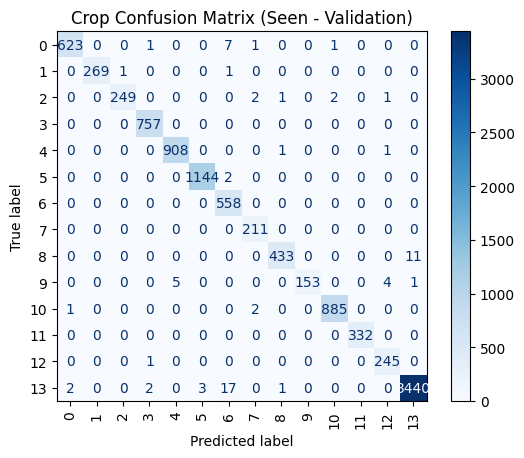

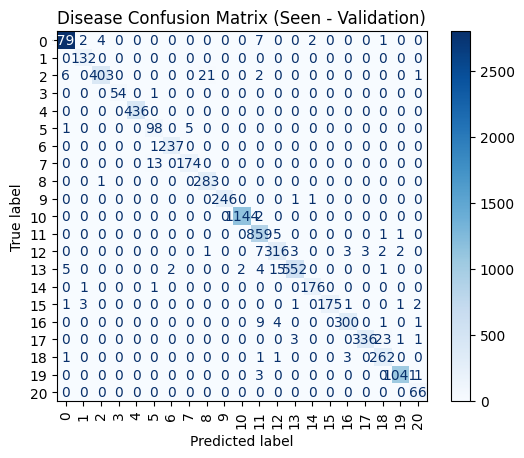

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gather predictions and ground truth for the seen dataset
seen_crop_preds, seen_disease_preds, seen_crop_labels, seen_disease_labels = [], [], [], []

model.eval()
with torch.no_grad():
    for images, crop_labels, disease_labels in tqdm(test_seen_loader, desc="Collecting Predictions for Confusion Matrix"):
        images, crop_labels, disease_labels = images.to(device), crop_labels.to(device), disease_labels.to(device)
        crop_logits, disease_logits, _ = model(images)

        _, crop_preds = torch.max(crop_logits, 1)
        _, disease_preds = torch.max(disease_logits, 1)

        seen_crop_preds.extend(crop_preds.cpu().numpy())
        seen_disease_preds.extend(disease_preds.cpu().numpy())
        seen_crop_labels.extend(crop_labels.cpu().numpy())
        seen_disease_labels.extend(disease_labels.cpu().numpy())

# Crop Confusion Matrix
crop_matrix = confusion_matrix(seen_crop_labels, seen_crop_preds)
ConfusionMatrixDisplay(confusion_matrix=crop_matrix).plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Crop Confusion Matrix (Seen - Validation)")
plt.show()

# Disease Confusion Matrix
disease_matrix = confusion_matrix(seen_disease_labels, seen_disease_preds)
ConfusionMatrixDisplay(confusion_matrix=disease_matrix).plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Disease Confusion Matrix (Seen - Validation)")
plt.show()


** Use unseen data to extract features and evaluate the model's performance. **

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Feature extraction function
def extract_features(loader):
    model.eval()
    features = []
    labels_crop = []
    labels_disease = []
    with torch.no_grad():
        for images, crop_labels, disease_labels in loader:
            images = images.to(device)
            _, _, feature_vec = model(images)
            features.append(feature_vec.cpu().numpy())
            labels_crop.extend(crop_labels.numpy())
            labels_disease.extend(disease_labels.numpy())
    features = np.concatenate(features, axis=0)
    return features, np.array(labels_crop), np.array(labels_disease)

# Evaluate Top-N accuracy
def evaluate_top_n(loader, n=1, task='crop'):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, crop_labels, disease_labels in loader:
            images = images.to(device)
            if task == 'crop':
                logits = model(images)[0]
                labels = crop_labels.to(device)
            else:
                logits = model(images)[1]
                labels = disease_labels.to(device)

            top_n_preds = torch.topk(logits, n, dim=1).indices
            correct += sum([labels[i] in top_n_preds[i] for i in range(labels.size(0))])
            total += labels.size(0)
    return correct / total


In [ ]:

# Extract features from unseen dataset
unseen_features, unseen_crop_labels, unseen_disease_labels = extract_features(test_unseen_loader)

# Evaluate Top-1 and Top-5 accuracy
top_1_crop_acc = evaluate_top_n(test_unseen_loader, n=1, task='crop')
top_5_crop_acc = evaluate_top_n(test_unseen_loader, n=5, task='crop')
top_1_disease_acc = evaluate_top_n(test_unseen_loader, n=1, task='disease')
top_5_disease_acc = evaluate_top_n(test_unseen_loader, n=5, task='disease')


# Print results
print("Unseen Data - Top-1 Crop Accuracy:", top_1_crop_acc)
print("Unseen Data - Top-5 Crop Accuracy:", top_5_crop_acc)
print("Unseen Data - Top-1 Disease Accuracy:", top_1_disease_acc)
print("Unseen Data - Top-5 Disease Accuracy:", top_5_disease_acc)





Unseen Data - Top-1 Crop Accuracy: 0.39814814814814814
Unseen Data - Top-5 Crop Accuracy: 0.9212962962962963
Unseen Data - Top-1 Disease Accuracy: 0.5462962962962963
Unseen Data - Top-5 Disease Accuracy: 0.875


Save with .h file

In [ ]:
# Save the entire model
torch.save(model, 'model_test_without_domain.h5')


In [ ]:
# Save to a specific location (e.g., Google Drive)
model_save_path = '/content/drive/My Drive/model_test_without_domain.h5'
torch.save(model, model_save_path)

print(f"Model saved at {model_save_path}")


Model saved at /content/drive/My Drive/model_test_without_domain.h5
